## Implementation of Stochastic and batch gradient descent in Python

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
15,1175,2,42.0
19,800,1,32.0
3,1521,3,75.0
6,2732,4,135.0
1,2600,4,120.0


**Preprocessing / Scaling: Since our columns are on different scale it is important to perform scaling on them**

In [203]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis=1))
scaled_y = sy.fit_transform(df[['price']])

### (1) Implement Batch Gradient Descnet

In [264]:
number_of_features = scaled_X.shape[1] # number of columns in scaled_X
w = np.ones(shape = (number_of_features))
b = 0
total_samples = scaled_X.shape[0] # number of rows in scaled_X
learning_rate = 0.01

cost_list = []
weight_list = []
bias_list = []
epoch_list = []

epochs = 500
for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T)+b
    w_grad = (2/total_samples)*np.dot(scaled_X.T, (y_predicted- scaled_y.reshape(-1)))
    b_grad = (2/total_samples)*np.sum(y_predicted-scaled_y.T)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_predicted-scaled_y.T))

    if i%10==0:
        cost_list.append(cost)
        weight_list.append(w)
        bias_list.append(b)
        epoch_list.append(i)

In [265]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

**the equation** 
### W1 = 0.707, w2 = 0.675, b = -0.230

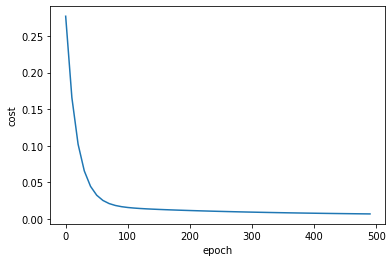

In [266]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

### Let's predict with new dataset!

In [279]:
new_data = sx.transform([[2600, 4]]).reshape(-1)

c:\Projects\Python\Python_practice\.venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [289]:
scaled_price = w[0]*new_data[0]+w[1]*new_data[1]+b
scaled_price, sy.inverse_transform([[scaled_price]])[0][0]

(0.7144803261679701, 128.45484403267596)

## Stochastic Gradient Descent Implementation
### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropagete to adjust weights.

In [290]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

4

In [366]:
number_of_features = scaled_X.shape[1] # number of columns in scaled_X
w_sgd = np.ones(shape = (number_of_features))
b_sgd = 0
total_samples = scaled_X.shape[0] # number of rows in scaled_X
learning_rate = 0.01

cost_list_sgd = []
weight_list_sgd = []
bias_list_sgd = []
epoch_list_sgd = []

epochs = 1000
for i in range(epochs):
    random_index = random.randint(0, total_samples-1) # random index from total samples
    sample_x = scaled_X[random_index]
    sample_y = scaled_y.reshape(-1)[random_index]
    
    y_predicted = np.dot(w_sgd, sample_x.T)+b_sgd
    w_grad = (2/total_samples)*np.dot(sample_x.T, (y_predicted- sample_y))
    b_grad = (2/total_samples)*np.sum(y_predicted-sample_y)

    w_sgd = w_sgd - learning_rate * w_grad
    b_sgd = b_sgd - learning_rate * b_grad

    cost_sgd = np.mean(np.square(y_predicted-sample_y))

    if i%10==0:
        cost_list_sgd.append(cost_sgd)
        weight_list_sgd.append(w_sgd)
        bias_list_sgd.append(b_sgd)
        epoch_list_sgd.append(i)

In [367]:
w_sgd, b_sgd, cost_sgd

(array([0.87400011, 0.84692573]), -0.24799451523935048, 0.06304964872148051)

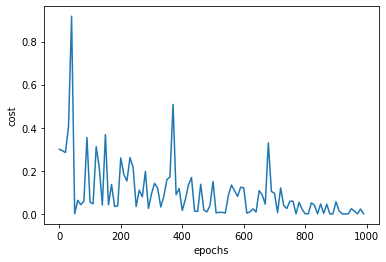

In [368]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [369]:
scaled_price = w_sgd[0]*new_data[0]+w_sgd[1]*new_data[1]+b
scaled_price, sy.inverse_transform([[scaled_price]])[0][0]

(0.9248856700599273, 156.85956545809017)

## Exercise
Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

In [357]:
np.random.permutation(20), scaled_X[[7, 18]]

(array([ 4,  3,  7, 14, 11, 12, 17,  9,  6, 18,  0,  2, 16,  8, 10,  5,  1,
        13, 19, 15]),
 array([[0.86206897, 0.75      ],
        [0.67931034, 0.5       ]]))

In [371]:
number_of_features = scaled_X.shape[1] # number of columns in scaled_X
w_mgd = np.ones(shape = (number_of_features))
b_mgd = 0
total_samples = scaled_X.shape[0] # number of rows in scaled_X
learning_rate = 0.01
batch_size = 5

cost_list_mgd = []
weight_list_mgd = []
bias_list_mgd = []
epoch_list_mgd = []

epochs = 1000
for i in range(epochs):
    random_indices = np.random.permutation(total_samples-1) 
    permutation_x = scaled_X[random_indices]
    permutation_y = scaled_y.reshape(-1)[random_indices]
    
    batch_x = permutation_x[1:1+batch_size]
    batch_y = permutation_y[1:1+batch_size]
    y_predicted = np.dot(w_mgd, batch_x.T)+b_mgd
    w_grad = (2/batch_size)*np.dot(batch_x.T, (y_predicted- batch_y))
    b_grad = (2/batch_size)*np.sum(y_predicted-batch_y)

    w_mgd = w_mgd - learning_rate * w_grad
    b_mgd = b_mgd - learning_rate * b_grad

    cost_mgd = np.mean(np.square(y_predicted-batch_y))

    if i%10==0:
        cost_list_mgd.append(cost_mgd)
        weight_list_mgd.append(w_mgd)
        bias_list_mgd.append(b_mgd)
        epoch_list_mgd.append(i)

In [372]:
w_mgd, b_mgd, cost_mgd

(array([0.68305857, 0.65892586]), -0.22165927125819912, 0.0028050138162343994)

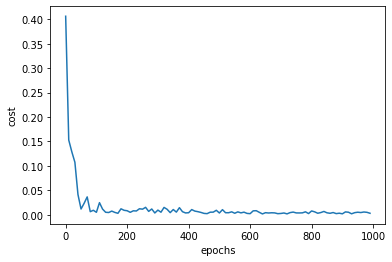

In [373]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_mgd, cost_list_mgd)

In [370]:
permutation_x[1:1+5], len(permutation_x[1:1+5])

(array([[0.5       , 0.5       ],
        [0.86206897, 0.75      ],
        [0.10344828, 0.25      ],
        [0.24862069, 0.5       ],
        [0.12758621, 0.25      ]]),
 5)

In [362]:
permutation_x

array([[0.25517241, 0.5       ],
       [0.5       , 0.5       ],
       [0.86206897, 0.75      ],
       [0.10344828, 0.25      ],
       [0.24862069, 0.5       ],
       [0.12758621, 0.25      ],
       [0.13103448, 0.5       ],
       [0.67931034, 0.5       ],
       [0.22068966, 0.5       ],
       [0.6662069 , 0.75      ],
       [0.13793103, 0.25      ],
       [0.12931034, 0.25      ],
       [0.06896552, 0.25      ],
       [0.62068966, 0.75      ],
       [0.68448276, 0.75      ],
       [0.08827586, 0.25      ],
       [0.34482759, 0.5       ],
       [1.        , 1.        ],
       [0.17586207, 0.5       ]])

In [299]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    y_predicted_list=[]
    
    for i in range(epochs):        
        y_predicted0 = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted0))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted0)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted0)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            y_predicted_list.append(y_predicted0)
        
    return w, b, cost, cost_list, epoch_list, y_predicted_list

#w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
#w, b, cost

In [82]:
a = np.array([1, 3, -5])
b = np.array([[4, -2, -1], [3, 1, 1]])

In [85]:
np.dot(a, b.T)

array([3, 1])

In [78]:
a.shape

(3,)

In [84]:
b.T.shape

(3, 2)

In [80]:
a = np.array([1, 3, -5])
b = np.array([4, -2, -1])

In [81]:
b.shape

(3,)